In [2]:
#### BACKTESTING FEATURES OF APP - V0 ####

### USER INPUTS:
# - Asset symbol
# - Time period of backtest 
# - fees & slippage for backtest

### CUSTOM STRATEGY BUILDER:
# - User can choose to implement one or multiple strategies
# - User defines name of strategy + % allocation to strategy
# - Users can build rules based on indicators. 
# - Users can add regime filters to strategy

### BACKTESTING OUTPUTS:b
# - Equity curve with benchmark
# - Signals plot
# - Drawdown plot
# - Rolling Sharpe plot
# - List of signals and trades as a dataframe
# - Trades statistics and distribution plot

In [16]:
import pandas as pd

df = pd.read_csv('backtest_results.csv')

<Axes: >

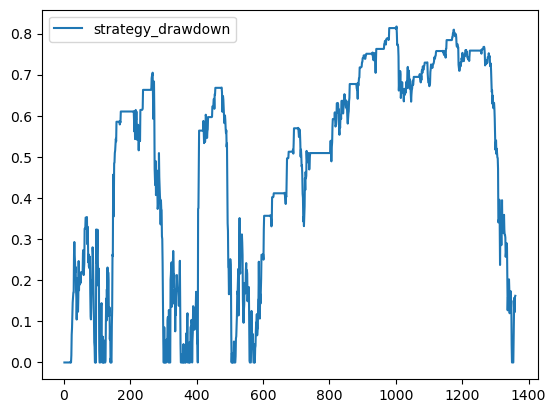

In [18]:
df[['strategy_drawdown']].plot()

In [6]:
def calculate_metrics(returns):
    """Calculate performance metrics for the given returns series"""
    total_return = (returns + 1).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1 if len(returns) > 0 else 0
    sharpe_ratio = np.sqrt(252) * returns.mean() / returns.std() if returns.std() != 0 else 0
    max_drawdown = (returns.cumsum() - returns.cumsum().cummax()).min()

    return {
        "Total Return": float(total_return),
        "Annualized Return": float(annualized_return),
        "Sharpe Ratio": float(sharpe_ratio),
        "Max Drawdown": float(max_drawdown)
    }

In [7]:
returns = df['strategy_returns']
(returns+1).prod() - 1

154.8050659614079

In [15]:
cum_returns = (1 + returns).cumprod()
dd =  1 - cum_returns.div(cum_returns.cummax())

dd.max()

0.8171383424575829

<Axes: >

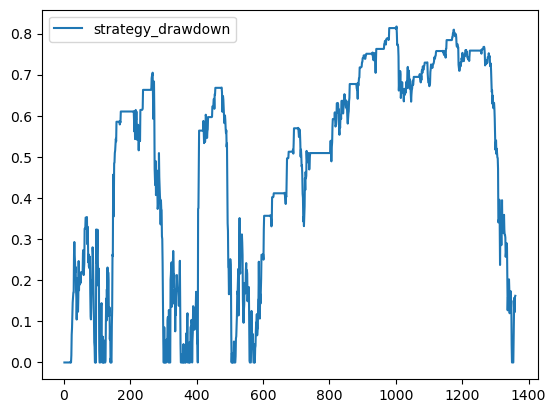

In [11]:
df[['strategy_drawdown']].plot()

In [8]:
(1+returns).cumprod() - 1

0              NaN
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
1356    163.274811
1357    155.724105
1358    162.181506
1359    155.325815
1360    154.805066
Name: strategy_returns, Length: 1361, dtype: float64

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np

KeyboardInterrupt: 

In [ ]:
# main.py
from backtester.engine import BacktestEngine
from data.data_manager import DataManager
from strategies.strategy_builder import StrategyBuilder
from analysis.performance_analyzer import PerformanceAnalyzer
from visualization.plotter import Plotter

def run_backtest(config):
    data_manager = DataManager(config['asset'], config['time_period'], config['contract_type'])
    strategy_builder = StrategyBuilder(config['strategies'])
    backtest_engine = BacktestEngine(data_manager, strategy_builder, config['fees'], config['slippage'])
    results = backtest_engine.run()
    
    analyzer = PerformanceAnalyzer(results)
    metrics = analyzer.calculate_metrics()
    
    plotter = Plotter(results, metrics)
    plotter.generate_plots()
    
    return results, metrics

# backtester/engine.py
class BacktestEngine:
    def __init__(self, data_manager, strategy_builder, fees, slippage):
        self.data_manager = data_manager
        self.strategy_builder = strategy_builder
        self.fees = fees
        self.slippage = slippage
    
    def run(self):
        # IMPLEMENT VECTORIZED BACKTESTING LOGIC FOR SINGLE ASSET
        # Implementation of the backtesting logic
        pass

# data/data_manager.py
class DataManager:
    def __init__(self, asset, time_period, contract_type):
        self.asset = asset
        self.time_period = time_period
        self.contract_type = contract_type
    
    def fetch_data(self):
        # Implementation to fetch and prepare data
        # FETCH DATA FROM EXISTING DATABASE
        pass

# strategies/strategy_builder.py
class StrategyBuilder:
    def __init__(self, strategies_config):
        self.strategies_config = strategies_config
    
    def build_strategies(self):
        # Implementation to build strategies based on user input
        pass

# strategies/base_strategy.py
class BaseStrategy:
    def __init__(self, name, allocation, frequency):
        self.name = name
        self.allocation = allocation
        self.frequency = frequency
    
    def generate_signals(self, data):
        # Implementation of signal generation logic
        pass

# strategies/indicators.py
class Indicator:
    def __init__(self, type, window):
        self.type = type
        self.window = window
    
    def calculate(self, data):
        # Implementation of indicator calculation
        pass

# strategies/position_sizing.py
class PositionSizer:
    def __init__(self, method, params):
        self.method = method
        self.params = params
    
    def calculate_position_size(self, data, signal):
        # Implementation of position sizing logic
        pass

# analysis/performance_analyzer.py
class PerformanceAnalyzer:
    def __init__(self, backtest_results):
        self.results = backtest_results
    
    def calculate_metrics(self):
        # Implementation of performance metrics calculation
        pass

# visualization/plotter.py
class Plotter:
    def __init__(self, backtest_results, performance_metrics):
        self.results = backtest_results
        self.metrics = performance_metrics
    
    def generate_plots(self):
        # Implementation of plot generation
        pass

# utils/helpers.py
# Various helper functions and utilities

# config/settings.py
# Configuration settings and constants

In [1]:
from binance.client     import Client

ModuleNotFoundError: No module named 'binance'

In [ ]:
import yfinance as yf

In [5]:
import numpy    as np
import pandas   as pd
from binance.client     import Client
from datetime import datetime


def fetch_candlesticks(client, symbol, interval, start_str, end_str):
    """Fetch historical candlestick data from Binance"""
    try:
        candlesticks = client.get_historical_klines(symbol, interval, start_str=start_str, end_str=end_str)
        df = pd.DataFrame(candlesticks, columns=['open_time', 'open', 'high', 'low', 'close', 'volume',
                                                 'close_time', 'quote_asset_volume', 'number_of_trades',
                                                 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
        df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
        df.set_index('close_time', inplace=True)
        df = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
        
        return df
    except:
        return None

KeyboardInterrupt: 